In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [4]:
df = pd.read_csv('data/processed_data/covid-19-state-level.csv', index_col=0)

In [10]:
df.head()

,date,state,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,fips,cases,deaths
0,2020-02-15,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-16,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-17,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-18,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


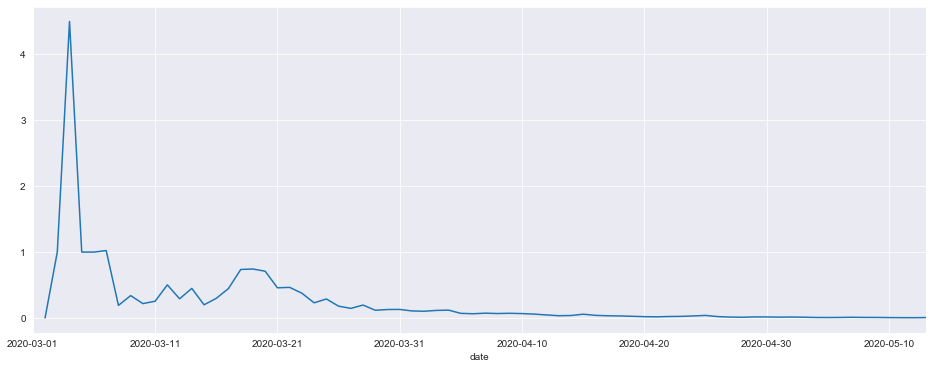

In [21]:
cases = df[df.state == 'New York'].set_index('date')['cases'].pct_change().dropna()
# Scale by 100 to get percentages
# cases = 100 * cases.asfreq('D')

fig, ax = plt.subplots()

ax = cases.plot(ax=ax)

In [22]:
# contrived dataset
data = df[df.state == 'New York']['cases'].reset_index(drop=True)

# fit model
auto_reg = AutoReg(data, lags=3)
model = auto_reg.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  cases   No. Observations:                   89
Model:                     AutoReg(3)   Log Likelihood                -738.021
Method:               Conditional MLE   S.D. of innovations           1290.396
Date:                Wed, 02 Dec 2020   AIC                             14.442
Time:                        11:20:50   BIC                             14.584
Sample:                             3   HQIC                            14.499
                                   89                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    344.3973    218.547      1.576      0.115     -83.948     772.742
cases.L1       1.8720      0.108     17.387      0.000       1.661       2.083
cases.L2      -0.7952      0.214     -3.723      0.000      -1.214      -0.377
cases.L3      -0.0778      0.110     -0.706      0.480      -0.294       0.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0234           -0.0199j            1.0236           -0.0031
AR.2            1.0234           +0.0199j            1.0236            0.0031
AR.3          -12.2697           -0.0000j           12.2697           -0.5000
-----------------------------------------------------------------------------
"""